# HT 4. Modelos de Árboles de Decisión

## Miembros
- Francisco Javier Castillo Cerna 21562
- Fernanda Esquivel de León 21542
- Andrés Estuardo Montoya 21552

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DM-House-Saleprice-Predictor)

## Link al documento
El documento puede ser visualizado [acá](https://docs.google.com/document/d/1epV70f3ZMXSBei_e2BAuRYk5oIA3SR9INmNR5e3FXoE/edit?usp=sharing)

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Use los mismos conjuntos de entrenamiento y prueba que usó para los modelos de regresión lineal en la hoja de trabajo anterior.

In [197]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [199]:
# NA Will be replaced with 0
# For ordinal data, the greater the value, the better the quality

df["MSZoning"] = le.fit_transform(df["MSZoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Alley"] = le.fit_transform(df["Alley"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = df["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
df["ExterQual"] = df["ExterQual"].map(condition_map)
df["ExterCond"] = df["ExterCond"].map(condition_map)
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = df["BsmtQual"].map(condition_map)
df["BsmtCond"] = df["BsmtCond"].map(condition_map)
df["BsmtExposure"] = df["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
df["BsmtFinType1"] = df["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
df["BsmtFinType2"] = df["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = df["HeatingQC"].map(condition_map)
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = df["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
df["KitchenQual"] = df["KitchenQual"].map(condition_map)
df["Functional"] = le.fit_transform(df["Functional"])
df["FireplaceQu"] = df["FireplaceQu"].map(condition_map)
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = df["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
df["GarageQual"] = df["GarageQual"].map(condition_map)
df["GarageCond"] = df["GarageCond"].map(condition_map)
df["PavedDrive"] = df["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
df["PoolQC"] = df["PoolQC"].map(condition_map)
df["Fence"] = df["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

In [200]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

### 2. Elabore un árbol de regresión para predecir el precio de las casas usando todas las variables.

In [201]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [202]:
temp = df.copy()
X = temp.drop('SalePrice', axis=1)
y = temp['SalePrice']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [204]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

### 3. Úselo para predecir y analice el resultado. ¿Qué tal lo hizo?

In [205]:
from sklearn.metrics import mean_squared_error

In [206]:
y_pred = tree.predict(X_test)

In [207]:
f'RMSE: {mean_squared_error(y_test, y_pred):.2e}'

'RMSE: 1.53e+09'

In [208]:
f'R2: {tree.score(X_test, y_test):.2f}'

'R2: 0.78'

#### 3.1 ¿Qué tal lo hizo?

### 4. Haga, al menos, 3 modelos más cambiando el parámetro de la profundidad del árbol.

In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance

# Dephts to test on the tree
depths = [3, 5, 10]

results = []

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False) 
    r2 = tree.score(X_test, y_test)
    results.append((depth, rmse, r2))

for depth, rmse, r2 in results:
    print(f"Depth: {depth}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Depth: 3, RMSE: 44209.04, R2: 0.72
Depth: 5, RMSE: 39160.53, R2: 0.78
Depth: 10, RMSE: 38417.90, R2: 0.79


D:\UVG\DataMining\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\UVG\DataMining\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\UVG\DataMining\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 4.1 ¿Cuál es el mejor modelo para predecir el precio de las casas?
Se puede observar que el RMSE obtenido es mucho mejor en comparación con el obtenido mediante regresión lineal.

### 5. Compare los resultados con el modelo de regresión lineal de la hoja anterior, ¿Cuál lo hizo mejor?

#### 5.1 Resultados de regresión lineal
![Linear Regression Results](data/LinearRegressionResults.png)

#### 5.2 ¿Cuál lo hizo mejor?

### 6. Cree una variable respuesta que le permita clasificar las casas en Económicas, Intermedias o Caras. 

In [210]:
price_class_df = df.copy()

In [211]:
lower_limit = np.percentile(price_class_df['SalePrice'], 33)
upper_limit = np.percentile(price_class_df['SalePrice'], 66)

def classify_house(price):
    if price < lower_limit:
        return 'Economical'
    elif price < upper_limit:
        return 'Intermediate'
    else:
        return 'Expensive'

price_class_df['Classification'] = price_class_df['SalePrice'].apply(classify_house)

print(price_class_df[['SalePrice', 'Classification']].head())

   SalePrice Classification
0     208500      Expensive
1     181500   Intermediate
2     223500      Expensive
3     140000   Intermediate
4     250000      Expensive


### 7. Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto anterior. Explique los resultados a los que llega. Muestre el modelo gráficamente. 

In [212]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [213]:
X = price_class_df.drop(['SalePrice', 'Classification'], axis=1)  
y = price_class_df['Classification'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [214]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [215]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.75


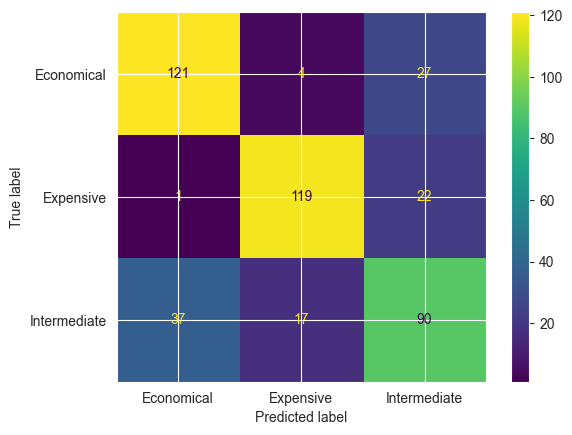

In [216]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

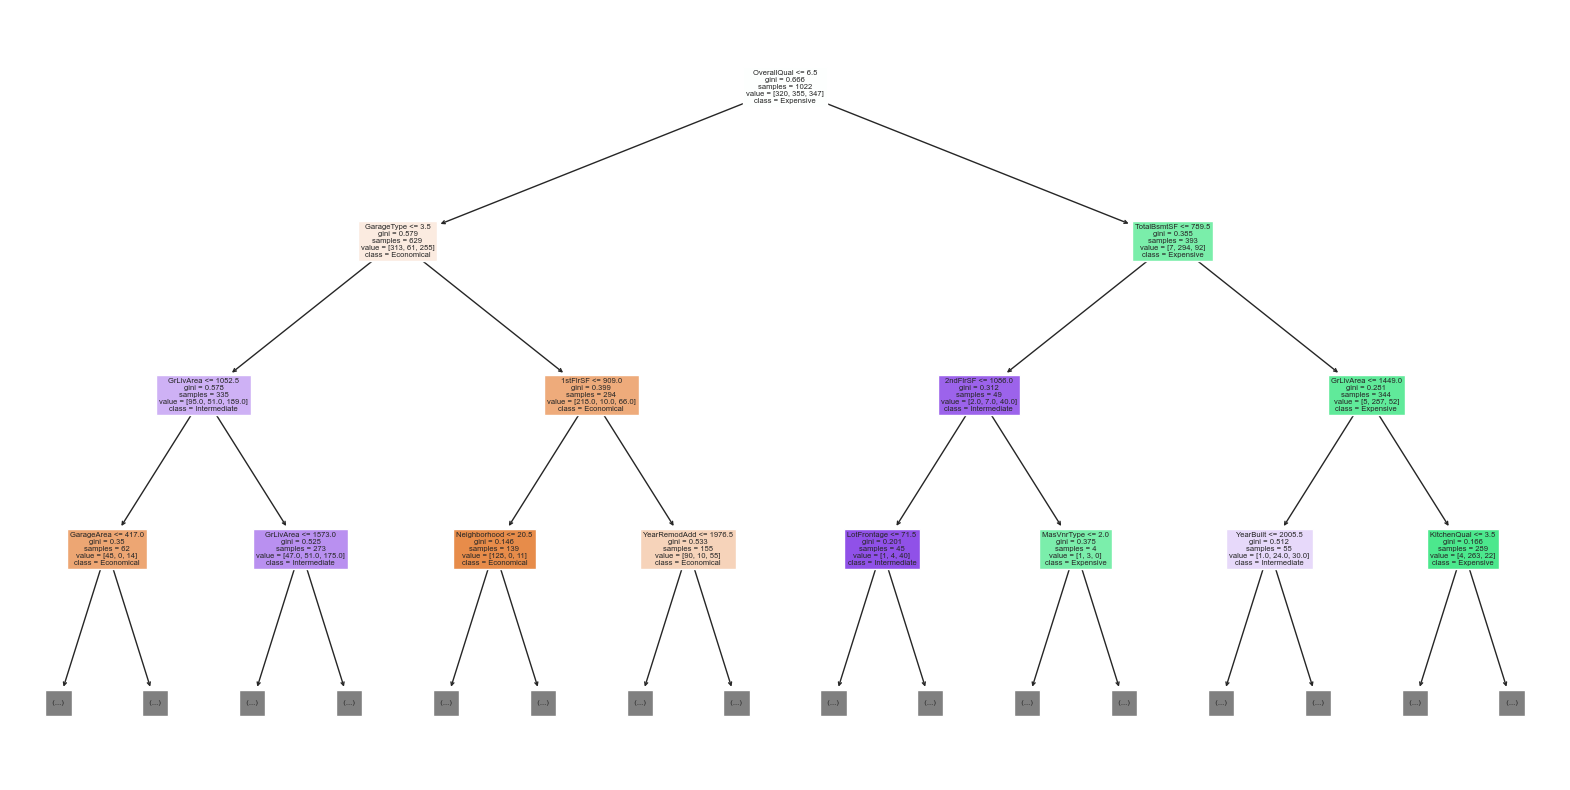

In [217]:
plt.figure(figsize=(20, 10))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=classifier.classes_, max_depth=3)
plt.show()

#### 7.1 Explique los resultados a los que llega

Comentario

### 8. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar

In [218]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [219]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score:
0.7534246575342466

Classification Report:
              precision    recall  f1-score   support

  Economical       0.76      0.80      0.78       152
   Expensive       0.85      0.84      0.84       142
Intermediate       0.65      0.62      0.64       144

    accuracy                           0.75       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.75      0.75      0.75       438


### 9. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

#### 9.1 Matriz de confusión

In [220]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[121   4  27]
 [  1 119  22]
 [ 37  17  90]]


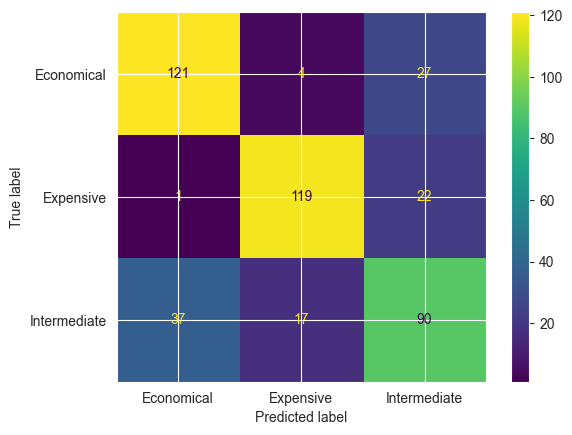

In [221]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

#### 9.2 Análisis de la eficiencia y los errores
Analisis

### 10. Entrene un modelo usando validación cruzada, prediga con él. ¿le fue mejor que al modelo anterior? 

In [222]:
from sklearn.model_selection import cross_val_score

In [223]:
classifier_cv = DecisionTreeClassifier(random_state=42)

In [224]:
# Perform 5-fold cross validation
cv_scores = cross_val_score(classifier_cv, X, y, cv=5)

In [225]:
# Print the accuracy of each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.2f}")

Fold 1: 0.77
Fold 2: 0.72
Fold 3: 0.81
Fold 4: 0.74
Fold 5: 0.75


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [227]:
classifier_cv.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [228]:
y_pred_cv = classifier_cv.predict(X_test)

In [229]:
accuracy_cv = accuracy_score(y_test, y_pred_cv)
print(f"Model Accuracy: {accuracy_cv:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))

Model Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

  Economical       0.76      0.80      0.78       152
   Expensive       0.85      0.84      0.84       142
Intermediate       0.65      0.62      0.64       144

    accuracy                           0.75       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.75      0.75      0.75       438


In [230]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_cv))

Confusion Matrix:
[[121   4  27]
 [  1 119  22]
 [ 37  17  90]]


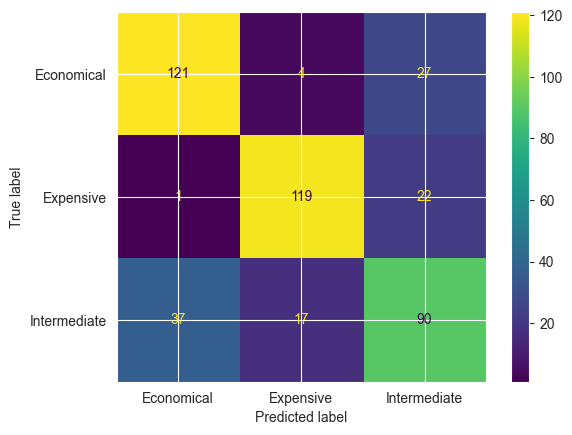

In [231]:
cm = confusion_matrix(y_test, y_pred_cv, labels=classifier_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_cv.classes_)
disp.plot()

#### 10.1 ¿Le fue mejor que al modelo anterior?
Respuesta

### 11. Haga, al menos, 3 modelos más cambiando el parámetro de la profundidad del árbol.

In [232]:
depths = [3, 5, 10]

results = []

for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((depth, accuracy))
    
for depth, accuracy in results:
    print(f"Depth: {depth}, Accuracy: {accuracy:.2f}")

Depth: 3, Accuracy: 0.75
Depth: 5, Accuracy: 0.78
Depth: 10, Accuracy: 0.77


#### 11.1 ¿Cuál funcionó mejor?
Funcionó mejor...

### 12. Repita el análisis usando Random Forest como algoritmo de predicción, explique sus resultados comparando ambos algoritmos.

#### 12.1 Random Forest

In [233]:
from sklearn.ensemble import RandomForestClassifier


In [234]:
forest = RandomForestClassifier(random_state=42)

In [235]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [236]:
y_pred_forest = forest.predict(X_test)

In [238]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Model Accuracy: {accuracy_forest:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest))

Model Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

  Economical       0.84      0.88      0.86       152
   Expensive       0.90      0.90      0.90       142
Intermediate       0.77      0.72      0.75       144

    accuracy                           0.84       438
   macro avg       0.83      0.84      0.83       438
weighted avg       0.83      0.84      0.83       438


In [239]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest))

Confusion Matrix:
[[134   1  17]
 [  0 128  14]
 [ 26  14 104]]


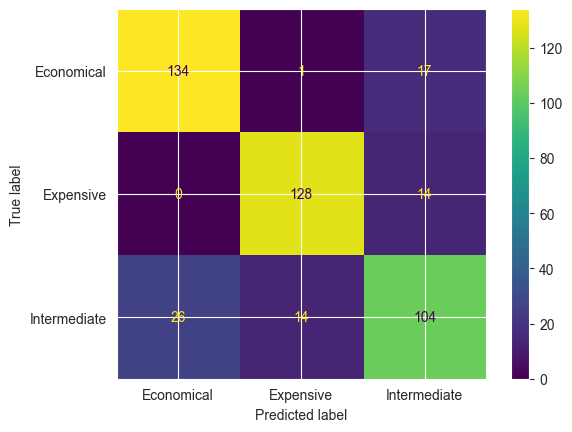

In [240]:
cm = confusion_matrix(y_test, y_pred_forest, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()

In [242]:
depths = [3, 5, 10]

results = []

for depth in depths:
    forest = RandomForestClassifier(max_depth=depth, random_state=42)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((depth, accuracy))
    
for depth, accuracy in results:
    print(f"Depth: {depth}, Accuracy: {accuracy:.2f}")

Depth: 3, Accuracy: 0.79
Depth: 5, Accuracy: 0.82
Depth: 10, Accuracy: 0.83


#### 12.2 Random Forest with Cross Validation

In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [244]:
forest_cv = RandomForestClassifier(random_state=42)

In [245]:
# Perform 5-fold cross validation
cv_scores = cross_val_score(forest_cv, X, y, cv=5)

In [246]:
# Print the accuracy of each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.2f}")

Fold 1: 0.85
Fold 2: 0.84
Fold 3: 0.85
Fold 4: 0.84
Fold 5: 0.82


In [247]:
forest_cv.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [248]:
y_pred_forest_cv = forest_cv.predict(X_test)

In [249]:
accuracy_forest_cv = accuracy_score(y_test, y_pred_forest_cv)
print(f"Model Accuracy: {accuracy_forest_cv:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest_cv))

Model Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

  Economical       0.84      0.88      0.86       152
   Expensive       0.90      0.90      0.90       142
Intermediate       0.77      0.72      0.75       144

    accuracy                           0.84       438
   macro avg       0.83      0.84      0.83       438
weighted avg       0.83      0.84      0.83       438


In [250]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest_cv))

Confusion Matrix:
[[134   1  17]
 [  0 128  14]
 [ 26  14 104]]


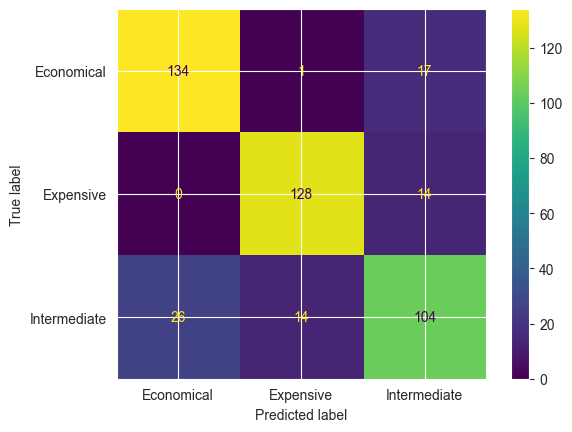

In [251]:
cm = confusion_matrix(y_test, y_pred_forest_cv, labels=forest_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_cv.classes_)
disp.plot()

In [252]:
depths = [3, 5, 10]

results = []

for depth in depths:
    forest = RandomForestClassifier(max_depth=depth, random_state=42)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((depth, accuracy))
    
for depth, accuracy in results:
    print(f"Depth: {depth}, Accuracy: {accuracy:.2f}")

Depth: 3, Accuracy: 0.79
Depth: 5, Accuracy: 0.82
Depth: 10, Accuracy: 0.83


#### 12.3 Comparación de resultados